<a href="https://colab.research.google.com/github/JoyMuthoniNjeru/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP 4: BRAINSTACK :)

QSTN 1

In [6]:
import pandas as pd

df = pd.read_csv("/content/mallcustomerdata.zip")
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


QSTN 2

In [7]:
#Data cleaning
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Confirm no null values remain
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


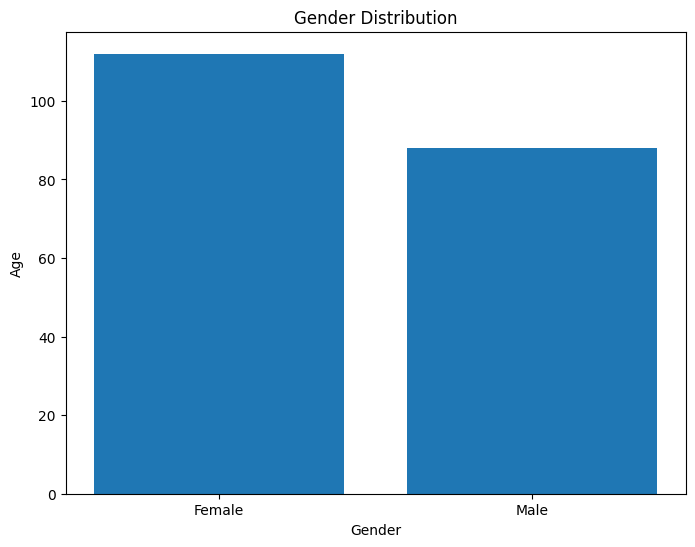

In [9]:
#Insights from the dataset
#Using count plot for gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts())
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

The above shows the mall has more female than male customers

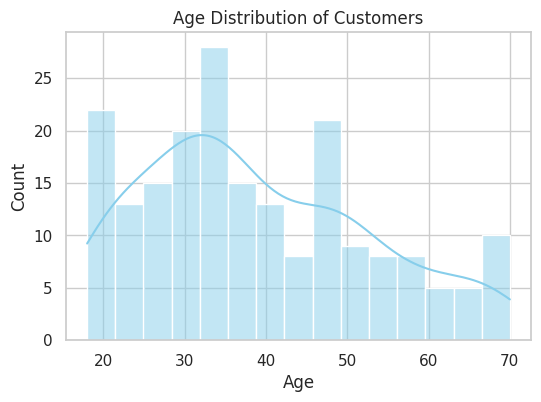

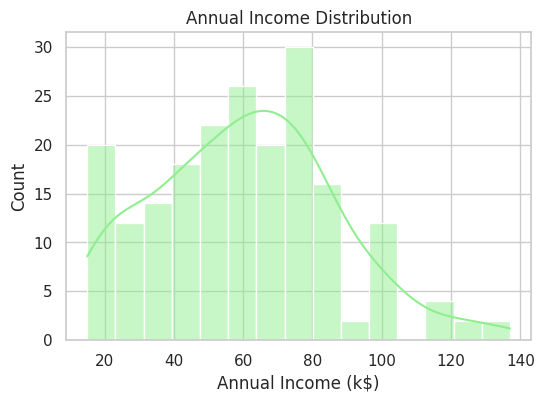

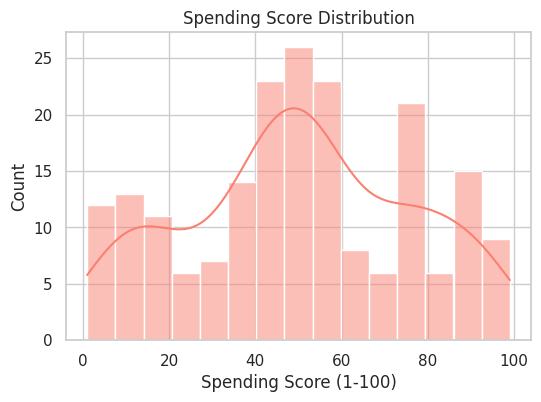

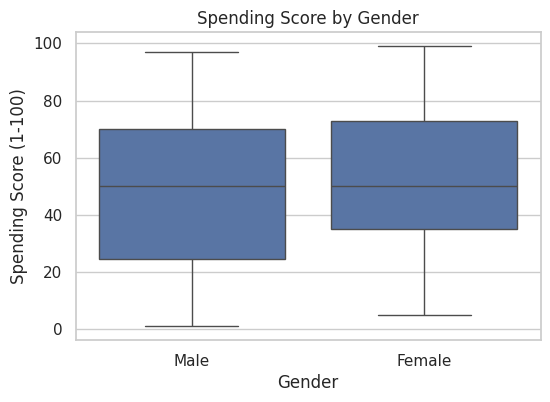

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.show()

# 2. Distribution of Annual Income
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='lightgreen')
plt.title('Annual Income Distribution')
plt.show()

# 3. Distribution of Spending Score
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='salmon')
plt.title('Spending Score Distribution')
plt.show()

# 4. Gender vs Spending Score (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()


QSTN 3a


In [12]:
#Silhouette score
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1)
    print(f"k={k} → silhouette score = {silhouette_score(X1, labels):.3f}")


k=2 → silhouette score = 0.535
k=3 → silhouette score = 0.652
k=4 → silhouette score = 0.601
k=5 → silhouette score = 0.610


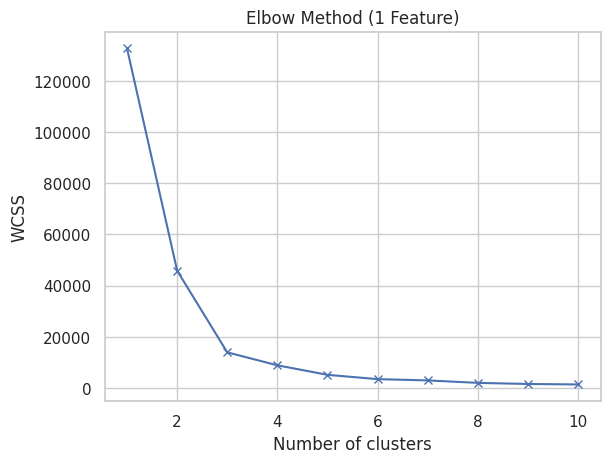

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming df is loaded in a previous cell, if not, load it here:
# import pandas as pd
# df = pd.read_csv("/content/mallcustomerdata.zip")

X1 = df[['Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method (1 Feature)')
plt.show()

QSTN3b

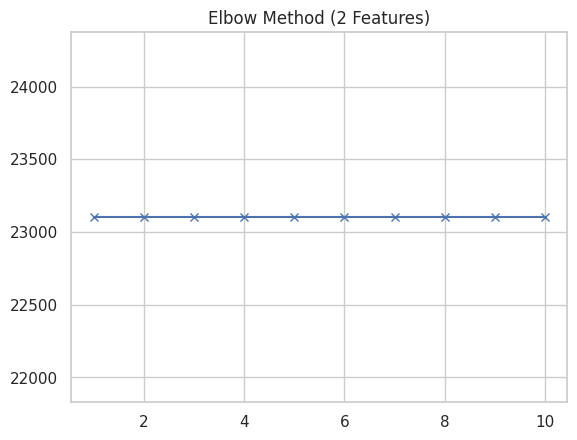

In [15]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Elbow Method (2 Features)')
plt.show()


QSTN 4

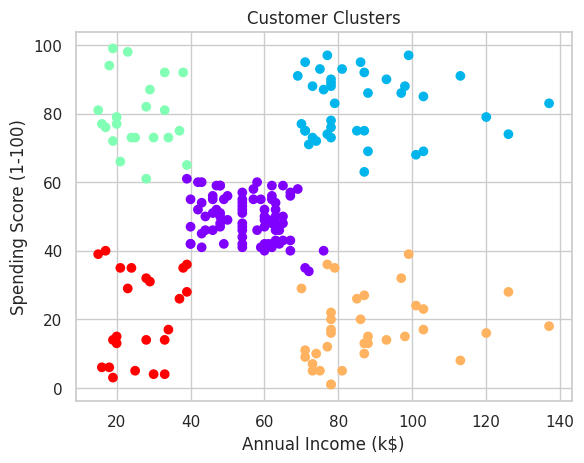

In [16]:
#Visualize clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X2)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='rainbow')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


QSTN 5

Using only Spending Score gave limited results, while adding Annual Income produced clearer and more meaningful clusters. It showed how income affects spending habits.

Cluster Summary:

Red: Low income, low
spending – offer discounts.

Orange: High income, low spending – use personalized offers.

Purple: Average income, average spending – maintain with promotions.

Green: Low income, high spending – reward loyalty.

Blue: High income, high spending – focus on VIP and luxury services.

Overall, the two-feature clustering helps the mall target customers better and improve marketing effectiveness.

Team Picture

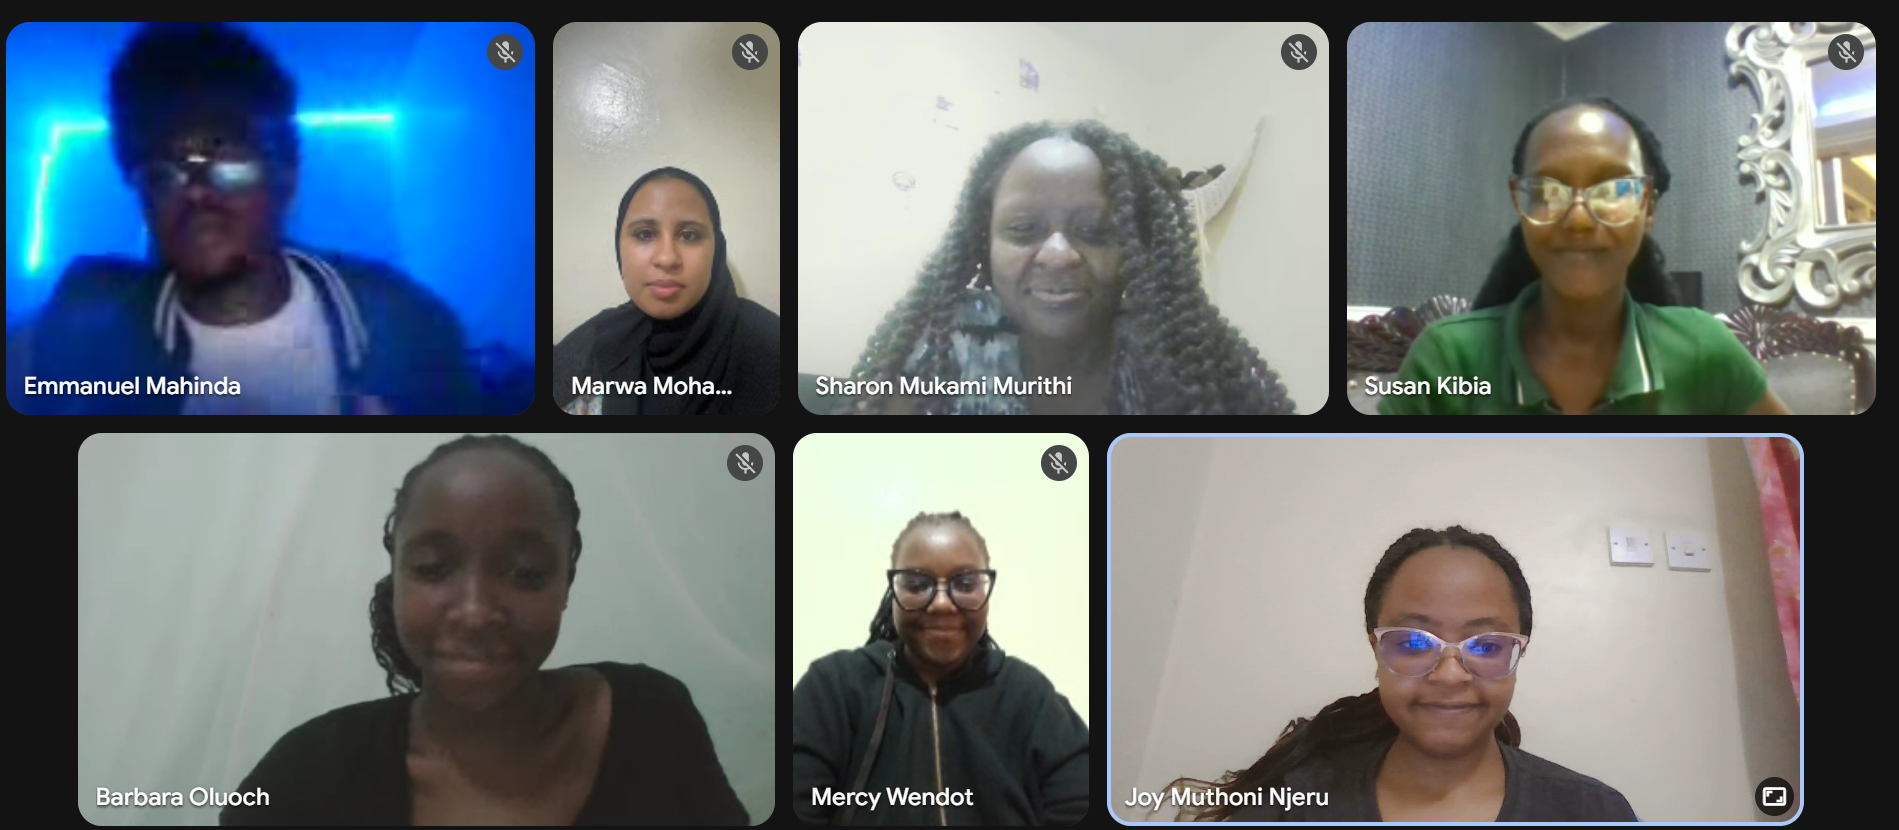